# Capstone Design Project: Predicting if a Reddit Meme is a Good or  Bad Meme

David M. Arnold<br> 
Orion99DA@gmail.com<br>
BrainStation Data Science Candidate<br>
Winter Cohort 2021<br>

**Workbook #2 - Data Wrangling and Transformation<br>**

This project is based on a dataset of collected Reddit memes that is shared on Kaggle.com.  Memes play an important role in social media platforms like Facebook, Twitter, Reddit and 4Chan and are shared by all types of users. I wanted to explore this data to determine if Machine Learning algorithms and Image Classification models could accurate predict what memes were actually popular in the Reddit social media platform, based on the amount of up votes and down votes each of these memes received.

While this project is meant to be a technical study of what factors may or may not contribute to a meme's popularity on Reddit, there are user names, comments and even the memes themselves that people reviewing this project may find vulgar and offensive.  

Please note that this project will be divided into several workbooks that will review and clean the data, transform the data into usable forms, perform the machine learning process on the data and perform image classification on the meme images.

**Workbook Overview**

This workbook focuses on using the dataframes the were generated in workbook 1.  All of our feature columns are in a numeric form except for the title column, which is a brief description of the meme being posted.  The title column will be vectorized into a list of keywords that are present in the title column, these keywords will now become their own columns or features in the database.  Once the word vectorization process is completely, we can drop the title column and all that should remain are numeric columns, which are what is needed for the machine learning portion of the project.

### 2.1 Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Plotting and visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical processing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# To develop Train and Test data
from sklearn.model_selection import train_test_split

# For word vectorization libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML algorithm models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

Now that we have imported our libraries and packages for working with the data, I will read in the csv file that were created in workbook 1.  

#### 2.1.1 Read in the CSV Dataset

In [2]:
# Reading in the dataframe from workbook #1

df_json_4 = pd.read_csv('csv/df_json_4.csv', index_col=0)
df_json_4.head()

,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13,2017,8,13,6,1,1,0,16940
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12,2018,4,12,3,0,1,0,13720
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27,2017,8,27,6,1,3,1,19600
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14,2018,1,14,6,1,1,0,15400
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25,2018,1,25,3,0,1,0,18760


In [3]:
# Looking at the column info

df_json_4.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 0 to 3225
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3226 non-null   object
 1   date_posted       3226 non-null   object
 2   author            3226 non-null   object
 3   id_number         3226 non-null   object
 4   up_votes          3226 non-null   int64 
 5   media_link        3226 non-null   object
 6   image_thumbnail   3226 non-null   object
 7   height_thumbnail  3226 non-null   int64 
 8   width_thumbnail   3226 non-null   int64 
 9   date_created      3226 non-null   object
 10  year              3226 non-null   int64 
 11  month             3226 non-null   int64 
 12  day               3226 non-null   int64 
 13  weekday           3226 non-null   int64 
 14  weekend           3226 non-null   int64 
 15  post_counts       3226 non-null   int64 
 16  frequent_poster   3226 non-null   int64 
 17  thumbnail_pixe

Before we can break down the data into Train and Test splits for the machine learning process, we need to remove any non-numerical columns except for the title column.  The title column will be transformed using text vectorization. 

Additionally the up_votes column will need to be made into a binomial value of 0 for not a popular meme and 1 for a popular meme.  We will have to look at the distribution of up votes for the entire dataset and choose what value is the cut-off point whether a meme is viral or popular and then create the binomial column.  This will then be our 'target' feature of the machine learning process.

### 2.2 Working with Feature Columns

#### 2.2.1 Dropping Non-Numeric Columns and Unnecessary Columns

These are the columns that will be removed because they are not necessary for the machine learning process:

- `date_posted`
- `author`
- `id_number`
- `media_link`
- `image_thumbnail`
- `height_thumbnail`
- `width_thumbnail`
- `date_created`

Additionally I will drop the `unnamed` column which appears to be an index column.

In [4]:
# Creating a new dataframe, dropping unnecessary columns

df_json_5 = df_json_4.drop(["date_posted", "author", "id_number", "media_link", "image_thumbnail", "height_thumbnail", "width_thumbnail", "date_created"], axis=1)

print(df_json_4.shape)
print(df_json_5.shape)

(3226, 18)
(3226, 10)


In [5]:
# Checking the dataframe info, making sure the columns were dropped

df_json_5.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3226 non-null   object
 1   up_votes          3226 non-null   int64 
 2   year              3226 non-null   int64 
 3   month             3226 non-null   int64 
 4   day               3226 non-null   int64 
 5   weekday           3226 non-null   int64 
 6   weekend           3226 non-null   int64 
 7   post_counts       3226 non-null   int64 
 8   frequent_poster   3226 non-null   int64 
 9   thumbnail_pixels  3226 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 277.2+ KB


We now have a dataframe that is completely numerical values except for the title column, which will be vectorized.

#### 2.2.2 Converting the Up Votes Column into Binomial Categorization

Since the up votes in an a range of votes form, they need to be converted into binomial form.  This project will pursue the idea of what makes a meme popular meme from a categorical aspect, so either a meme is popular or it is not popular.  To do this, we will need to look at the all the votes each meme received, choose is cut-off point or a threshold number of votes and declare any meme that received more than this threshold of up votes is considered a popular meme and any meme that received less than this threshold is not a popular meme.

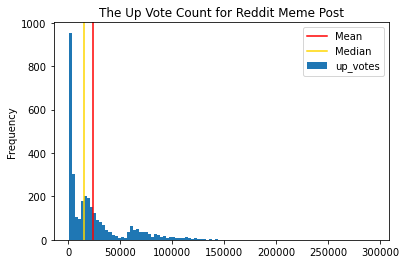

In [6]:
# Making a histogram plot for Additional Number Scoring

df_json_5["up_votes"].plot(
    kind="hist", bins=100, title="The Up Vote Count for Reddit Meme Post")
plt.axvline(df_json_5["up_votes"].mean(),
            c='red',
            label='Mean')
plt.axvline(df_json_5["up_votes"].median(),
            c='gold',
            label='Median')
plt.legend()

In [7]:
print(df_json_5['up_votes'].describe())
print(df_json_5['up_votes'].median())

count      3226.000000
mean      23802.590205
std       29055.319383
min         494.000000
25%        2842.750000
50%       14757.000000
75%       30334.500000
max      293544.000000
Name: up_votes, dtype: float64
14757.0


The mean or average up vote score for the entire dataset is ~23800 upvotes, but the median or the 50% center is 14757 up votes. The minimum number of votes a post received was 494 upvotes and the maximum number was 239544.  

Choosing the threshold for what constitutes a popular versus an unpopular meme will have to be decided between the mean or the average score and the median, which is the center line of all posts. 

It is important to choose the categorical threshold that is balanced otherwise you end up with imbalanced data and have to perform upsampling of the minority dataset or downsampling of the majority data.  Basically this makes sure that no one type of data is over represented or under represented in the machine learning process, so the algorithm gets exposed to relatively equal amounts of both representative data in the learning process so it learns to differentiate between the two.

Since the median or 50% of the data has either a score above 14757 upvotes and 50% has upvotes below that value, I will make a binomial column based on that number and set that as the categorical is the meme popular not not popular. 

In [8]:
# Convert up vote score into binomial categorization

df_json_5['popular_meme'] = np.where(
    df_json_5['up_votes'] >= 14757, 1, 0)
df_json_5['popular_meme'].head()

0    1
1    1
2    1
3    1
4    1
Name: popular_meme, dtype: int32

Now we can check the value counts to see the split of images that are 1's "Good" and 0's "Bad".  They are an equal split, so this means that there is no data imbalance.

In [9]:
# Checking the value counts of each type, 1's and 0's.

df_json_5['popular_meme'].value_counts()

1    1613
0    1613
Name: popular_meme, dtype: int64

We now have a column called `popular_meme` that is a binomial/categorical column that classifies each meme post as either popular (1) or not-popular (0).   There are equal numbers of memes that are either popular or not-popular, that way we do not have the risk of imbalanced data in our machine learning process.

In [10]:
df_json_5.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 0 to 3225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3226 non-null   object
 1   up_votes          3226 non-null   int64 
 2   year              3226 non-null   int64 
 3   month             3226 non-null   int64 
 4   day               3226 non-null   int64 
 5   weekday           3226 non-null   int64 
 6   weekend           3226 non-null   int64 
 7   post_counts       3226 non-null   int64 
 8   frequent_poster   3226 non-null   int64 
 9   thumbnail_pixels  3226 non-null   int64 
 10  popular_meme      3226 non-null   int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 289.8+ KB


In [11]:
# Dropping the upvotes column

df_json_6 = df_json_5.drop(["up_votes"], axis=1)

print(df_json_5.shape)
print(df_json_6.shape)

(3226, 11)
(3226, 10)


Now we have the new dataframe with the new column `popular_meme` and have dropped the `up_votes` column.
The next step is to perform a train/test split of the data into two separate data sets that will be used in the machine learning process. 

Once we have the train/test splits of data, we can perform the vectorization of the title column.

### 2.3 Performing the Train Test Split

The train/test split of the dataset is an important part of the machine learning process.  Essentially what happens is you take your entire dataset and split it into two different groups or sections.  Additionally you want to make sure that all the features or columns of data are equally represented in each of these sections or groups.  If one type of data is heavily represented in the training dataset and not in the testing data, the machine model that learned from the training dataset will only recognize the features that were present in the training dataset and score poorly when you are using the testing dataset to test the model. 

The training dataset is normally a much larger portion of the dataset, anywhere from 60% to 80% of your data and the testing dataset is the remaining portion.  The testing dataset is also strictly kept separate from the machine model when the model is learning and being fine tuned.  Once the model has been fine tuned and you're confident in the models performance, only then is the testing dataset introduced to the model for testing it's accuracy.

**Separate the dataframe into the target variable and the features**
   

In [12]:
# The target variable, 'popular_meme'

y = df_json_6['popular_meme']

# The feature columns, drop the popular meme column

X = df_json_6.drop('popular_meme', axis = 1)

print(y.shape)
print(X.shape)

(3226,)
(3226, 9)


**Train/Validation and Test Split**

Now that we have our X and y defined, we can perform the train/test split.  We want to ensure that the datasets contain representative amounts of features in each of the Train and Test datasets so will use 'stratify'.

Since we will also be a making a validation set, the training portion will be called "remainder" and then be further split into a Train and Validation set.

In [13]:
# Splitting the Remainder Set and the Test Set at an 80% / 20% split

X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

print(X.shape, y.shape)
print(X_remainder.shape, y_remainder.shape)
print(X_test.shape, y_test.shape)

(3226, 9) (3226,)
(2580, 9) (2580,)
(646, 9) (646,)


**Train and Validation Split**

In [14]:
# Splitting the Training Set and the Validation Set at a 70% / 30% split

X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

print(X_remainder.shape, y_remainder.shape)
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(2580, 9) (2580,)
(1806, 9) (1806,)
(774, 9) (774,)


Proportions of the three sets compared to the original dataframe:

- Training: 56%
- Validation: 24%
- Test: 20%

In [15]:
# The represented proportion of the popular vs not-popular memes in the datasets

# Original dataset
print(f'Orignal dataset popular vs not-popular:')
print(y.value_counts()/len(y), '\n')

# Training dataset
print(f'Training dataset popular vs not-popular:')
print(y_train.value_counts()/len(y_train), '\n')

# Training dataset
print(f'Validation dataset popular vs not-popular:')
print(y_validation.value_counts()/len(y_validation), '\n')

# Testing dataset
print(f'Testing dataset popular vs not-popular:')
print(y_test.value_counts()/len(y_test), '\n')

Orignal dataset popular vs not-popular:
1    0.5
0    0.5
Name: popular_meme, dtype: float64 

Training dataset popular vs not-popular:
0    0.506645
1    0.493355
Name: popular_meme, dtype: float64 

Validation dataset popular vs not-popular:
1    0.505168
0    0.494832
Name: popular_meme, dtype: float64 

Testing dataset popular vs not-popular:
1    0.512384
0    0.487616
Name: popular_meme, dtype: float64 



The distributions of the data have been split equally for the training, validation and the testing datasets. 

Now that we have our train/validation/test datasets, we can move forward to vectorizing the `title` column and pull out the words for each title.

### 2.4 Working with Text Data

#### 2.4.1 Vectorizing the Post Title Column

The `title` columns has as brief description that is entered by the author/Reddit user of the meme they are posting.  These words may or may not have in impact on the up vote score or the "popularity" of each individual post, but the machine learning model can used these vectorized words to determine if in fact any of the words are more prevalent in the popular memes.  This is also the last column of data that needs to be transformed from an object datatype into numerical form.  After which, all of our data will be in numerical form and begin performing the machine learning process.

**Setup Dataframes for Train, Validation and Test Datasets**

In [16]:
# Setting up dividual dataframes for each set

words_train = X_train['title']
words_validation = X_validation['title']
words_test = X_test['title']

print(words_train.shape)
print(words_validation.shape)
print(words_test.shape)

(1806,)
(774,)
(646,)


In [17]:
# Looking at the first couple rows

words_train.head(3)

919                            Is it legal ?
2506       'I guess we had a smaller button'
1420    Both are pretty iconic to be honest.
Name: title, dtype: object

In [18]:
# Splitting the string

words_train.str.split()
words_validation.str.split()
words_test.str.split()

2571                      [our, whole, life, is, a, meme]
187     [You, cant, have, a, GPU, and, CPU, in, the, s...
1169                                     [Every, Time...]
2082      [When, you, have, to, admit, you, are, wrong..]
705     [I, think, we, can, all, agree, on, that, logi...
                              ...                        
2183               [Recycling, rates, around, the, world]
2803    [Sunday, is, coming...i, must, warn, you, abou...
428                          [Literally, the, same, shit]
2857                    [Ni🅱🅱a, shootn, up, the, school.]
1884    [The, time, Stephen, met, Jim, Carrey, RIP, St...
Name: title, Length: 646, dtype: object

In [19]:
# Remove numerals from the words

words_train = words_train.str.replace('\d+', '')
words_validation = words_validation.str.replace('\d+', '')
words_test = words_test.str.replace('\d+', '')

Here we will instantiate and fit the training matrix to a word vectorizer model.  We will exclude certain words that are in a library called "stop words" that are necessary words like "the, ago, her".   We will also remove words that appear too infrequently using the "min_df" function.

In [20]:
# Instantiate the model
bagofwords = CountVectorizer(stop_words="english", min_df=2)

# Fit the model
bagofwords = bagofwords.fit(words_train)

# Transform the model
words_train_transformed = bagofwords.transform(words_train)
words_validation_transformed = bagofwords.transform(words_validation)
words_test_transformed = bagofwords.transform(words_test)

# Look at the shape of the model
print(f'The shape of words_train_transformed is: {words_train_transformed.shape[0]} rows by {words_train_transformed.shape[1]} columns')
print(f'The shape of words_validation_transformed is: {words_validation_transformed.shape[0]} rows by {words_validation_transformed.shape[1]} columns')
print(f'The shape of words_test_transformed is: {words_test_transformed.shape[0]} rows by {words_test_transformed.shape[1]} columns')

The shape of words_train_transformed is: 1806 rows by 674 columns
The shape of words_validation_transformed is: 774 rows by 674 columns
The shape of words_test_transformed is: 646 rows by 674 columns


In [21]:
# Performing a random search and printing out 20 words from the dataset

words = bagofwords.get_feature_names()
some_indices = np.random.choice(np.arange(674), size=20)
    
samples = [words[i] for i in some_indices]
print(samples)

['survive', 'gonna', 'circle', 'll', 'picked', 'progressive', 'hero', 'price', 'cards', 'thinking', 'mod', 'sell', 'weather', 'deeper', 'allowed', 'posted', 'let', 'watching', 'hungry', 'couple']


In [22]:
# Printing out word couts of the train word set

counts = np.array(words_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,survive,gonna,circle,ll,picked,progressive,hero,price,cards,thinking,mod,sell,weather,deeper,allowed,posted,let,watching,hungry,couple
total_corpus_count,2,3,2,5,2,2,3,2,2,3,2,2,2,3,2,3,6,3,2,2


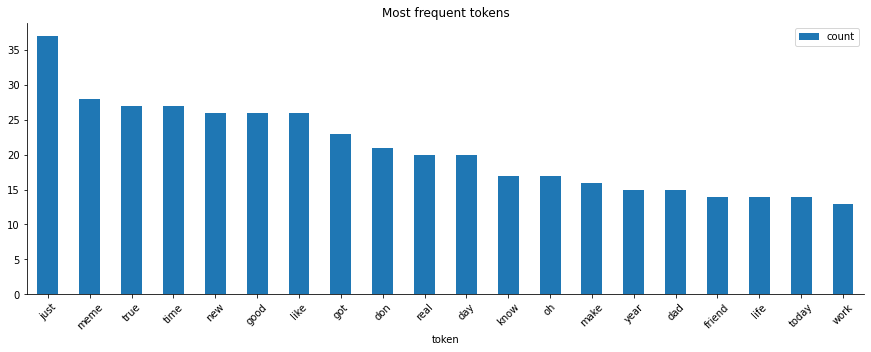

In [23]:
word_counts = words_train_transformed.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

We can see here are the top 20 frequently used words or "tokens" from the meme title column.  

Each of the vectorized words are in a sparse matrix.  We need to convert to a dense matrix in order to concat them with our original dataframe.

In [24]:
# Converting each sparse matrix into an array

train_dense_array = words_train_transformed.toarray()
validation_dense_array = words_validation_transformed.toarray()
test_dense_array = words_test_transformed.toarray()

print(train_dense_array.shape)
print(validation_dense_array.shape)
print(test_dense_array.shape)

(1806, 674)
(774, 674)
(646, 674)


In [25]:
# Creating a dataframe with the Train words array

df_train_words = pd.DataFrame(columns=bagofwords.get_feature_names(),
                           data=words_train_transformed.toarray())
display(df_train_words)

,absolutely,accurate,actually,adapt,adventure,advice,af,affled,afraid,aged,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Creating a dataframe with the Validation words array

df_validation_words = pd.DataFrame(columns=bagofwords.get_feature_names(),
                           data=words_validation_transformed.toarray())
display(df_validation_words)

,absolutely,accurate,actually,adapt,adventure,advice,af,affled,afraid,aged,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Creating a dataframe with the Test words array

df_test_words = pd.DataFrame(columns=bagofwords.get_feature_names(),
                           data=words_test_transformed.toarray())
display(df_test_words)

,absolutely,accurate,actually,adapt,adventure,advice,af,affled,afraid,aged,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Looking at the shape of the train, validation and test dataframes

print(df_train_words.shape)
print(df_validation_words.shape)
print(df_test_words.shape)

(1806, 674)
(774, 674)
(646, 674)


#### 2.4.2 Modeling Vectorized Text on Train and Validation Data

This will perform three machine learning algorithms on the training and validation datasets for the bag of words.
The models being used are a Logistic Regression model, a K-Nearest Neighbors model and Decision Trees model. 

In [29]:
%%time

# Instantiate models
all_models = {
    "logreg": LogisticRegression(C=1, solver='lbfgs'),
    "knn": KNeighborsClassifier(n_neighbors=5), 
    "dt": DecisionTreeClassifier(max_depth=10) 
    
}

train_scores = {}
validation_scores = {}

# Fit models
for name, model in all_models.items():
    model.fit(df_train_words, y_train)
    train_scores[name] = model.score(df_train_words, y_train)
    validation_scores[name] = model.score(df_validation_words, y_validation)

Wall time: 3.75 s


**Looking at the Accuracy Scores**


In [30]:
# Print the accuracy scores or the train and validation models

print(train_scores)
print(validation_scores)

{'logreg': 0.7331118493909191, 'knn': 0.6788482834994463, 'dt': 0.5448504983388704}
{'logreg': 0.5516795865633075, 'knn': 0.5180878552971576, 'dt': 0.5193798449612403}


The Logistic Regression and KNN (K-Nearest Neighbors) models had decent training training score accuracies but the scores on the validation data were both lower.  This shows signs of "overfitting" the data, or the model was so used to aspects of the training data that when introduced to the validation data, it was not able to accurately make predictions on new data that it has not learned from.   The Decision Trees model had relatively close scores between the training and the validation data, but the scores were much lower.  

As it stands right now the models seem to be capable of predicting if a meme will be considered a "good meme" anywhere from ~51%-55% of the time.  

#### 2.4.3 Modeling Vectorized Text on Train and Test Data

This will now perform the same tests as above but instead this time we will be using the training data and the testing data on the bag of words.   

In [31]:
%%time

# Instantiate models
all_models = {
    "logreg": LogisticRegression(C=1, solver='lbfgs'),
    "knn": KNeighborsClassifier(n_neighbors=5), 
    "dt": DecisionTreeClassifier(max_depth=10) 
    
}

train_scores = {}
test_scores = {}

# Fit models
for name, model in all_models.items():
    model.fit(df_train_words, y_train)
    train_scores[name] = model.score(df_train_words, y_train)
    test_scores[name] = model.score(df_test_words, y_test)

Wall time: 4.38 s


**Looking at the Accuracy Scores**


In [32]:
# Looking at the accuracy score for the train and test models

print(train_scores)
print(test_scores)

{'logreg': 0.7331118493909191, 'knn': 0.6788482834994463, 'dt': 0.5448504983388704}
{'logreg': 0.5340557275541795, 'knn': 0.4984520123839009, 'dt': 0.5061919504643962}


After introducing all three of the same models to the test data, they achieved similar results.  This is just the first step in using machine learning models to determine if a meme is considered a "good" or a "bad" meme.  Additionally there are aspects of the models that we can change and fine tune to get a better predictive model.  

As it stands right now we have concluded on just the words of the title alone, that machine learning can predict if people will like a meme 50% of the time.  We also did not change any hyper parameters for any of the models.  I still feel that the words may have a relationship to this outcome and there are many other features that factor in to this.  

The next steps are to incorporate the vectorized words from the title columns back into a dataframe with the other feature columns and test all the features in the machine learning models. 

### 2.5 Concatinating the Dataframes

We now have to merge or concatinate our words dataframes with the dataframes that have all the other feature columns.  This will expand the size of the original dataframes that have only a few columns.

#### 2.5.1 Concatinating the Train Dataframe

In [33]:
# Creating a dataframe with the Training Dataframe and the Training words

X_train_1 = pd.concat([X_train.reset_index(drop=True), df_train_words.reset_index(drop=True)], axis=1)
X_train_1

,title,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,Is it legal ?,2017,12,6,2,0,4,1,18900,0,...,0,0,0,0,0,0,0,0,0,0
1,'I guess we had a smaller button',2018,1,14,6,1,4,1,16800,0,...,0,0,0,0,0,0,0,0,0,0
2,Both are pretty iconic to be honest.,2018,3,19,0,0,6,1,19600,0,...,0,0,0,0,0,0,0,0,0,0
3,Just girly things,2018,2,23,4,0,4,1,19600,0,...,0,0,0,0,0,0,0,0,0,0
4,Goodbye cruel internet,2017,12,13,2,0,1,0,16940,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,That'll show you,2018,4,9,0,0,90,1,19600,0,...,0,0,0,0,0,0,0,0,0,0
1802,People these day's are dumb.,2018,2,16,4,0,25,1,19180,0,...,0,0,0,0,0,0,0,0,0,0
1803,October is for one thing only!,2017,10,10,1,0,1,0,18760,0,...,0,0,0,0,0,0,0,0,0,0
1804,A Man Of Culture,2018,2,22,3,0,1,0,19460,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.5.2 Concatinating the Validation Dataframe

In [34]:
# Creating a dataframe with the Validation Dataframe and the Validation words

X_validation_1 = pd.concat([X_validation.reset_index(drop=True), df_validation_words.reset_index(drop=True)], axis=1)
X_validation_1

,title,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,Coming to the point,2017,11,21,1,0,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0
1,She just moved here from Las Vegas,2017,4,8,5,1,1,0,19180,0,...,0,0,0,0,0,0,0,0,0,0
2,USA #1 in education,2017,10,16,0,0,1,0,17500,0,...,0,0,0,0,0,0,0,0,0,0
3,The facts don’t lie,2018,2,15,3,0,1,0,14840,0,...,0,0,0,0,0,0,0,0,0,0
4,Needless to say I won that round.,2018,2,18,6,1,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,🅱️AD 🅱️OYS,2017,7,5,2,0,2,1,17360,0,...,0,0,0,0,0,0,0,0,0,0
770,🔪🤙🏻,2017,7,2,6,1,1,0,14000,0,...,0,0,0,0,0,0,0,0,0,0
771,0.0000457200 bitcoin,2018,2,1,3,0,73,1,16100,0,...,0,0,0,0,0,0,0,0,0,0
772,Using the Answer from Question 1...,2017,12,17,6,1,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.5.3 Concatinating the Test Dataframe

In [35]:
# Creating a dataframe with the Testing Dataframe and the Testing words

X_test_1 = pd.concat([X_test.reset_index(drop=True), df_test_words.reset_index(drop=True)], axis=1)
X_test_1.head(3)

,title,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,...,xd,ya,ye,yeah,year,years,yes,young,youtube,zucc
0,our whole life is a meme,2017,12,27,2,0,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0
1,You cant have a GPU and CPU in the same PC,2018,2,28,2,0,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0
2,Every Time...,2018,3,30,4,0,1,0,19600,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.5.4 Performing EDA on the Dataframes

Since we just merged three new dataframes with our vectorized words dataframes, we should perform a quick EDA to ensure there are no Null/NaN values in the columns and rows of data.

In [36]:
# Checking for Nulls
print(X_train_1.isnull().sum())

title      0
year       0
month      0
day        0
weekday    0
          ..
years      0
yes        0
young      0
youtube    0
zucc       0
Length: 683, dtype: int64


In [37]:
print(X_validation_1.isnull().sum())

title      0
year       0
month      0
day        0
weekday    0
          ..
years      0
yes        0
young      0
youtube    0
zucc       0
Length: 683, dtype: int64


In [38]:
print(X_test_1.isnull().sum())

title      0
year       0
month      0
day        0
weekday    0
          ..
years      0
yes        0
young      0
youtube    0
zucc       0
Length: 683, dtype: int64


There seems to be not be any nulls values in the new dataframes.

#### 2.5.5 Remove the Title Column

The title column which was just vectorized can now be dropped from each dataframe so only numeric columns of data remain.

In [39]:
# Looking at the dataframe columns

X_train_1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 683 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   title             object
 1   year              int64 
 2   month             int64 
 3   day               int64 
 4   weekday           int64 
 5   weekend           int64 
 6   post_counts       int64 
 7   frequent_poster   int64 
 8   thumbnail_pixels  int64 
 9   absolutely        int64 
 10  accurate          int64 
 11  actually          int64 
 12  adapt             int64 
 13  adventure         int64 
 14  advice            int64 
 15  af                int64 
 16  affled            int64 
 17  afraid            int64 
 18  aged              int64 
 19  ago               int64 
 20  ain               int64 
 21  alabama           int64 
 22  album             int64 
 23  allowed           int64 
 24  alternate         int64 
 25  amazon            int64 
 26  american          int64 
 27  anime            

In [40]:
# Looking at the shape of the dataframes

print(X_train_1.shape)
print(X_validation_1.shape)
print(X_test_1.shape)

(1806, 683)
(774, 683)
(646, 683)


Now we can drop the non-numeric 'title' column from the dataframes.

In [41]:
# Dropping the object data title columns from the dataframes

X_train_1 = X_train_1.drop(['title'], axis=1)
X_validation_1 = X_validation_1.drop(['title'], axis=1)
X_test_1 = X_test_1.drop(['title'], axis=1)

print(X_train_1.shape)
print(X_validation_1.shape)
print(X_test_1.shape)

(1806, 681)
(774, 681)
(646, 681)


In [42]:
# Looking at the columns of the train dataframe

X_train_1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 681 columns):
 #   Column            Dtype
---  ------            -----
 0   year              int64
 1   month             int64
 2   day               int64
 3   weekday           int64
 4   weekend           int64
 5   post_counts       int64
 6   frequent_poster   int64
 7   thumbnail_pixels  int64
 8   absolutely        int64
 9   accurate          int64
 10  actually          int64
 11  adapt             int64
 12  adventure         int64
 13  advice            int64
 14  af                int64
 15  affled            int64
 16  afraid            int64
 17  aged              int64
 18  ago               int64
 19  ain               int64
 20  alabama           int64
 21  album             int64
 22  allowed           int64
 23  alternate         int64
 24  amazon            int64
 25  american          int64
 26  anime             int64
 27  ank               int64
 28  answer           

In [43]:
# Looking at the columns of the validation dataframe

X_validation_1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 681 columns):
 #   Column            Dtype
---  ------            -----
 0   year              int64
 1   month             int64
 2   day               int64
 3   weekday           int64
 4   weekend           int64
 5   post_counts       int64
 6   frequent_poster   int64
 7   thumbnail_pixels  int64
 8   absolutely        int64
 9   accurate          int64
 10  actually          int64
 11  adapt             int64
 12  adventure         int64
 13  advice            int64
 14  af                int64
 15  affled            int64
 16  afraid            int64
 17  aged              int64
 18  ago               int64
 19  ain               int64
 20  alabama           int64
 21  album             int64
 22  allowed           int64
 23  alternate         int64
 24  amazon            int64
 25  american          int64
 26  anime             int64
 27  ank               int64
 28  answer            i

In [44]:
# Looking at the columns of the test dataframe

X_test_1.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 681 columns):
 #   Column            Dtype
---  ------            -----
 0   year              int64
 1   month             int64
 2   day               int64
 3   weekday           int64
 4   weekend           int64
 5   post_counts       int64
 6   frequent_poster   int64
 7   thumbnail_pixels  int64
 8   absolutely        int64
 9   accurate          int64
 10  actually          int64
 11  adapt             int64
 12  adventure         int64
 13  advice            int64
 14  af                int64
 15  affled            int64
 16  afraid            int64
 17  aged              int64
 18  ago               int64
 19  ain               int64
 20  alabama           int64
 21  album             int64
 22  allowed           int64
 23  alternate         int64
 24  amazon            int64
 25  american          int64
 26  anime             int64
 27  ank               int64
 28  answer            i

### 2.6 Saving the Dataframes

#### 2.6.1 Reviewing the Dataframes and Saving CSV Files

In [45]:
#  Checking the shape of each dataframe to be saved

print(f'The shape of df_json_5 is: {df_json_5.shape}')
print(f'The Shape of df_json_6 is: {df_json_6.shape}')
print(f'The Shape of X_train_1 is: {X_train_1.shape}')
print(f'The Shape of y_train is: {y_train.shape}')
print(f'The Shape of X_validation_1 is: {X_validation_1.shape}')
print(f'The Shape of y_validation is: {y_validation.shape}')
print(f'The Shape of X_test_1 is: {X_test_1.shape}')
print(f'The Shape of y_test is: {y_test.shape}')



The shape of df_json_5 is: (3226, 11)
The Shape of df_json_6 is: (3226, 10)
The Shape of X_train_1 is: (1806, 681)
The Shape of y_train is: (1806,)
The Shape of X_validation_1 is: (774, 681)
The Shape of y_validation is: (774,)
The Shape of X_test_1 is: (646, 681)
The Shape of y_test is: (646,)


#### 2.6.2 Saving the Current Dataframes and Continuing on with Machine Learning in Workbook #3

In [46]:
# Saving current dataframes to have for workbook 3

df_json_5.to_csv('csv/df_json_5.csv', header=True)
df_json_6.to_csv('csv/df_json_6.csv', header=True)
X_train_1.to_csv('csv/X_train_1.csv', header=True)
y_train.to_csv('csv/y_train.csv', header=True)
X_validation_1.to_csv('csv/X_validation_1.csv', header=True)
y_validation.to_csv('csv/y_validation.csv', header=True)
X_test_1.to_csv('csv/X_test_1.csv', header=True)
y_test.to_csv('csv/y_test.csv', header=True)

**End of Workbook 2:**<br>
Please continue with Workbook 3